<a href="https://colab.research.google.com/github/bioscom/Saharafarmers/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Write your code here
df.shape
print('The data has', df.shape[0], 'rows and', df.shape[1], "columns.")

The data has 1898 rows and 9 columns.


#### Observations:
- *There are 1898 rows and 9 columns present in the data*


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [6]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


####Observations:
- There are 1898 rows of data.

- restaurant_name = object data type
- cuisine_type = object data type
- day_of_the_week = object data type
- rating = object data type

- order_id = int data type
- customer_id = int data type
- food_preparation_time = int data type
- delivery_time = int data type

- cost_of_the_order = floating data type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [7]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [8]:
# Write your code here
# there are 736 missing data in rating column
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [9]:
#replace the 'Not given' in the rating column with NaN and change the data type to floating data type
df['rating'] = df['rating'].replace(['Not given'],np.nan)

In [10]:
#change the data type to floating data type
df['rating'] = df['rating'].astype(float)

In [11]:
df['rating'].apply(type).value_counts()

<class 'float'>    1898
Name: rating, dtype: int64

In [12]:
(df['rating'].isnull().sum()/df['rating'].shape[0])*100

38.77766069546891

#### Observations: 

- *There are 736 missing values in the data, in the column rating, it has 'Not given' as an input. The value supposed to be NaN. In this case, the 'Not given' was replaced with NaN.*


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [13]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:
- Minimum 20, Average 27.37 and Maximum 35 minutes it takes the food to be prepared once order is received.


### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
# Write the code here
non_rated_orders = df['rating'].isnull().sum()
print('The number of orders not rated is', non_rated_orders)

The number of orders not rated is 736


#### Observations: 
- 736 Orders are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

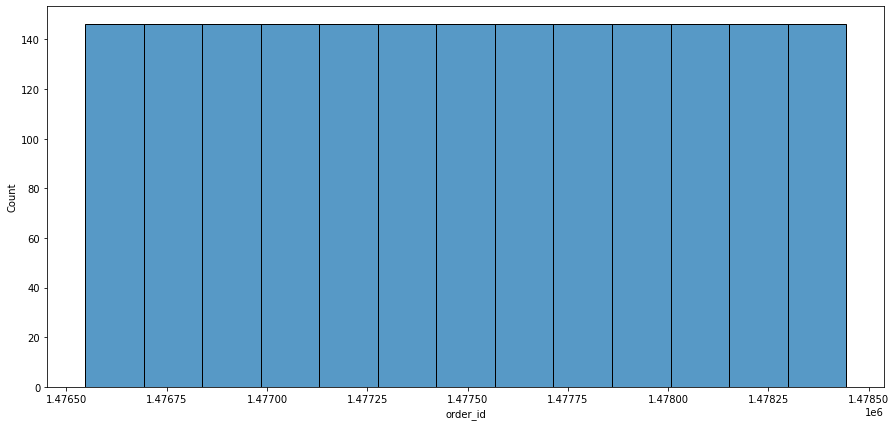

--------------------------------------------------


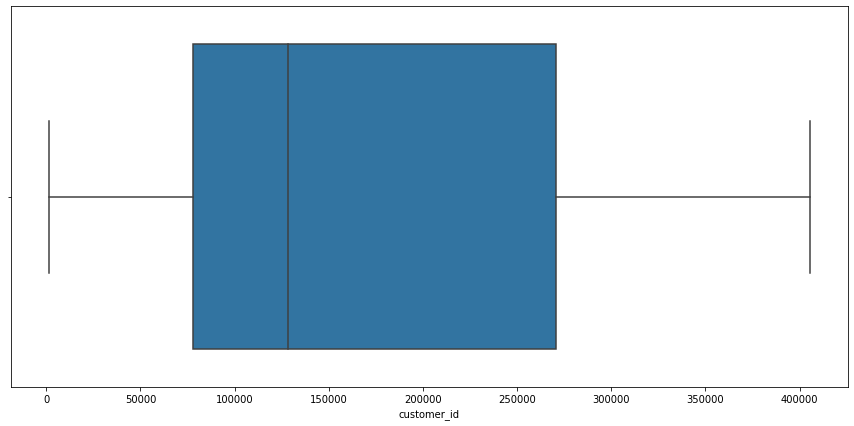

--------------------------------------------------


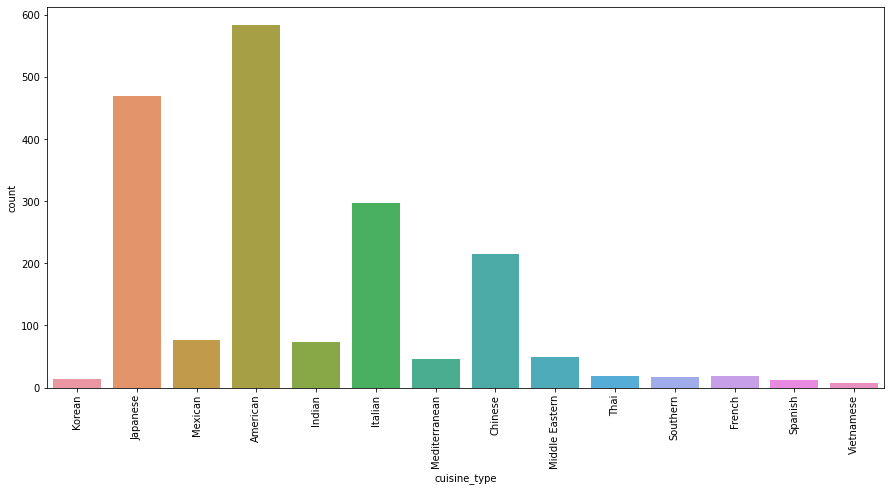

--------------------------------------------------


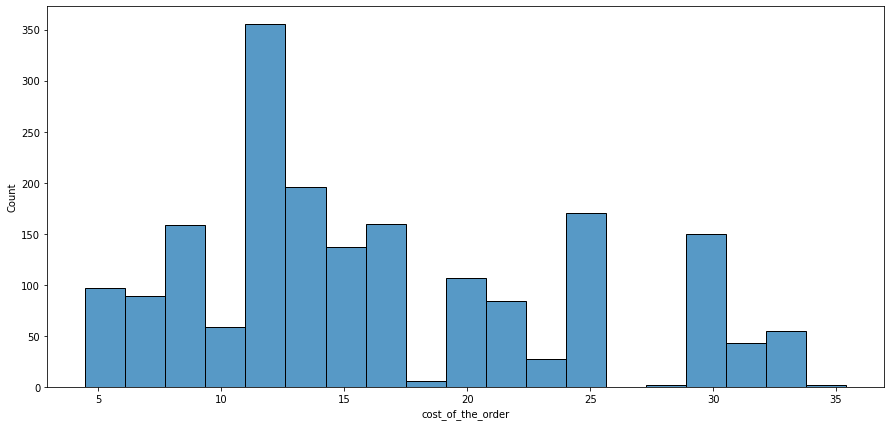

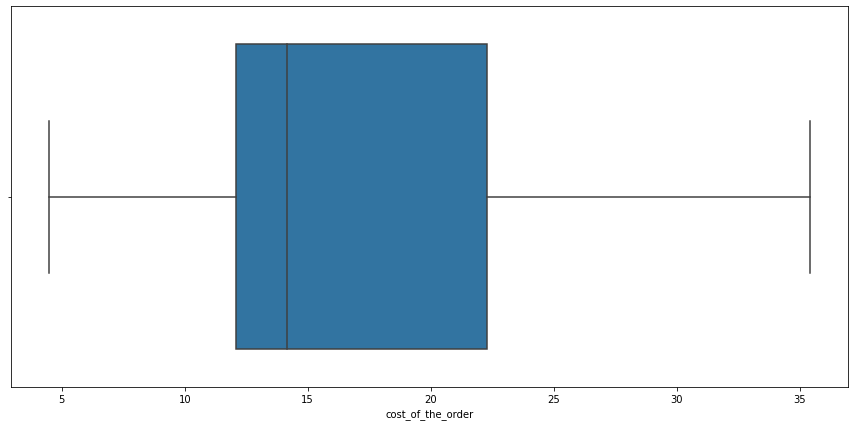

--------------------------------------------------


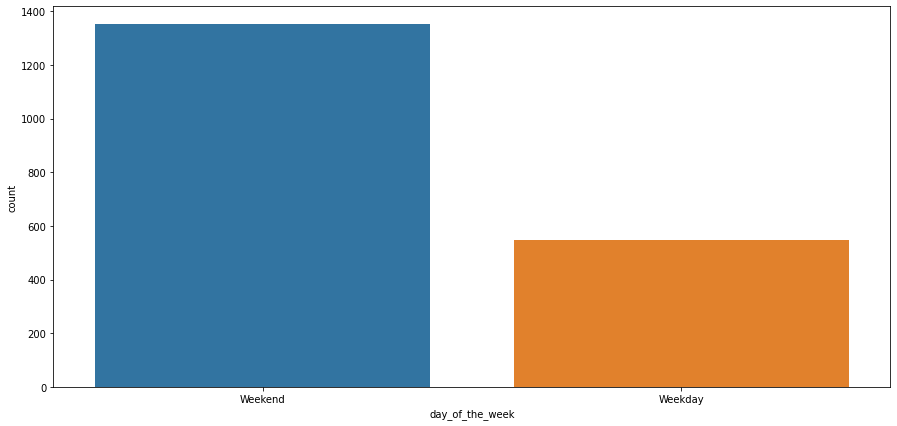

--------------------------------------------------


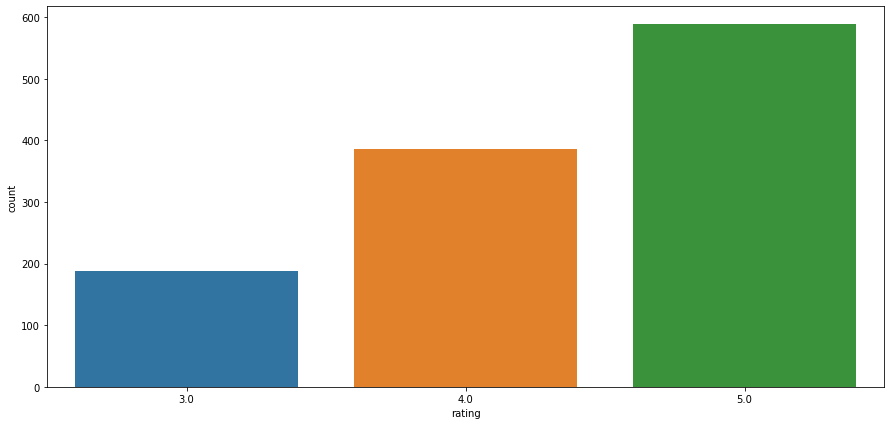

--------------------------------------------------


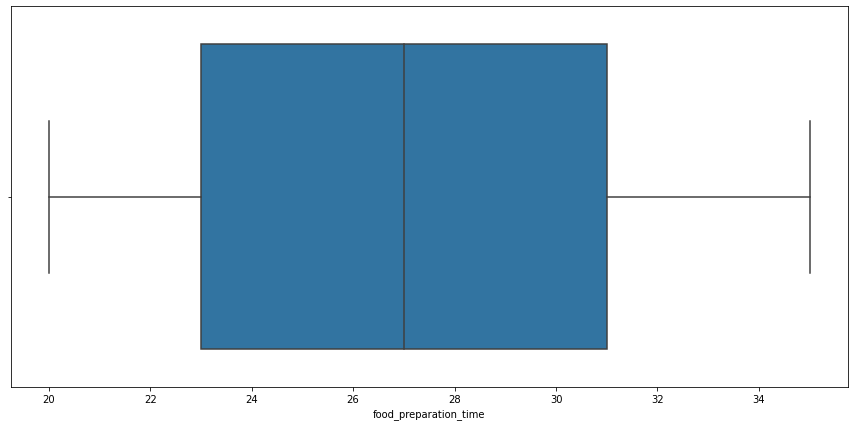

--------------------------------------------------


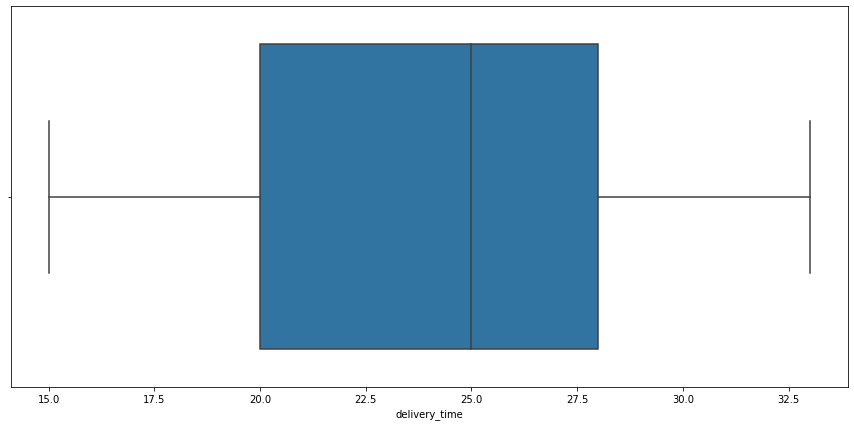

--------------------------------------------------


In [15]:
# Write the code here
#sns.histplot(data=df, x='cost_of_the_order');
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='order_id');
plt.show()
print('-' *50)

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='customer_id');
plt.show()
print('-' *50)
#sns.boxplot(data=df, x='restaurant_name');
#plt.show()
#print('-' *50)
# cuisine_type
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()
print('-' *50)

#cost_of_the_order
plt.figure(figsize=(15,7))
sns.histplot(data=df, x='cost_of_the_order');
plt.show()
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cost_of_the_order');
plt.show()
print('-' *50)

#day_of_the_week
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='day_of_the_week');
plt.show()
print('-' *50)

plt.figure(figsize=(15,7))
sns.countplot(data=df, x='rating');
plt.show()
print('-' *50)

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='food_preparation_time');
plt.show()
print('-' *50)

plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='delivery_time')
plt.show()
print('-' *50)

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [16]:
# Write the code here
df.groupby(['restaurant_name'])['order_id'].count().sort_values(ascending=False)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: order_id, Length: 178, dtype: int64

#### Observations: 

####The top 5 restaurant in terms of orders received are: 
- Shake Shark = 219, 
- The Meatball Shop = 132, 
- Blue Ribbon Sushi = 119, 
- Blue Ribbon Fried Chicken = 96 and 
- Parm = 68 number of orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [17]:
# Write the code here
df.groupby(by=['cuisine_type', 'day_of_the_week'])['day_of_the_week'].count().sort_values(ascending=False)

#df[df['cuisine_type']]

cuisine_type    day_of_the_week
American        Weekend            415
Japanese        Weekend            335
Italian         Weekend            207
American        Weekday            169
Chinese         Weekend            163
Japanese        Weekday            135
Italian         Weekday             91
Mexican         Weekend             53
Chinese         Weekday             52
Indian          Weekend             49
Middle Eastern  Weekend             32
Mediterranean   Weekend             32
Mexican         Weekday             24
Indian          Weekday             24
Middle Eastern  Weekday             17
Thai            Weekend             15
Mediterranean   Weekday             14
French          Weekend             13
Korean          Weekend             11
Southern        Weekend             11
Spanish         Weekend             11
Southern        Weekday              6
French          Weekday              5
Thai            Weekday              4
Vietnamese      Weekend         

#### Observations: 
- American Cuisine is the most popular cuisine on weekend with total order of 415


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Write the code here
(df[df['cost_of_the_order']>20].shape[0]/df.shape[0])*100

29.24130663856691

#### Observations: 
- 29% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417


#### Observations: 
- The mean order of delivery time is 24.16


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [20]:
# Write the code here
df.groupby(['customer_id'])['order_id'].count().sort_values(ascending=False)

customer_id
52832     13
47440     10
83287      9
250494     8
65009      7
          ..
105903     1
105992     1
106006     1
106324     1
405334     1
Name: order_id, Length: 1200, dtype: int64

#### Observations:
The Top 5 most costmers are:

1.   52832   =     13 orders
2.   47440   =     10 orders
3.   83287   =      9 orders
4.   250494  =      8 orders
5.   65009   =      7 orders






### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


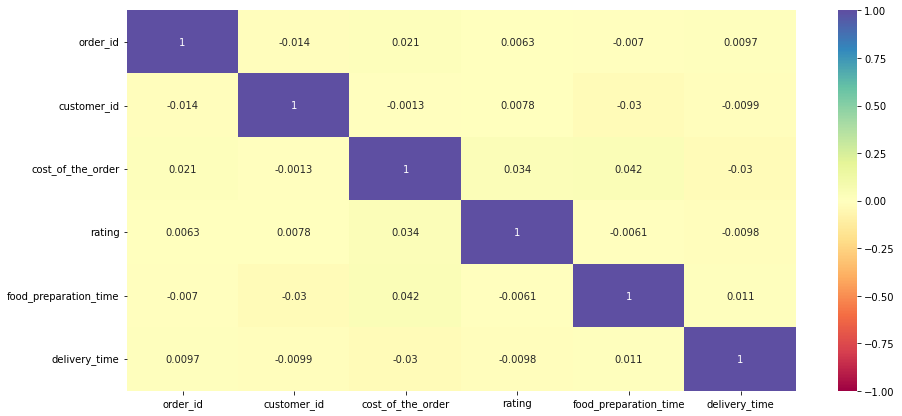

In [21]:
# Write the code here
#order_id
#customer_id
#restaurant_name
#cuisine_type
#cost_of_the_order
#day_of_the_week
#rating
#food_preparation_time
#delivery_time
plt.figure(figsize=(15,7))
sns.heatmap(data=df[['order_id','customer_id','cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1);
plt.show()

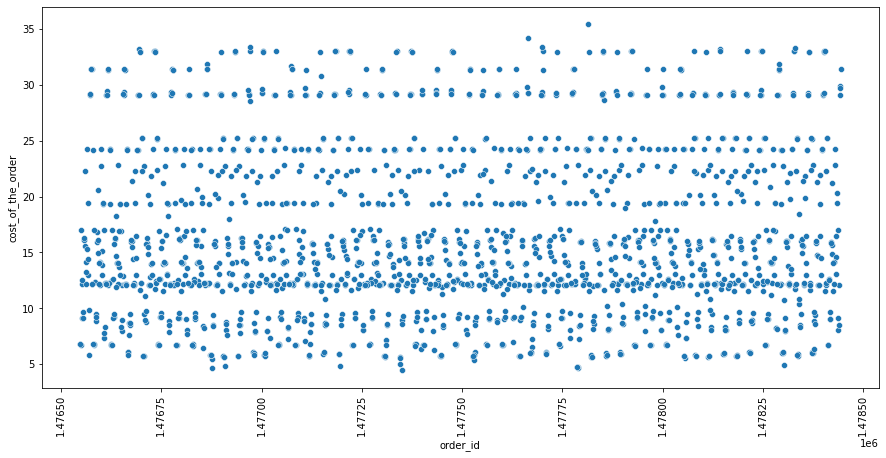

In [22]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='order_id', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

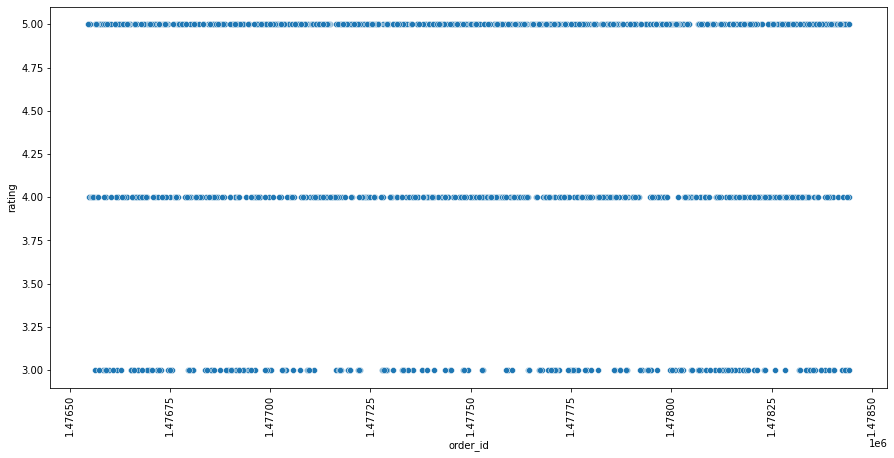

In [23]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='order_id', y='rating')
plt.xticks(rotation=90)
plt.show()

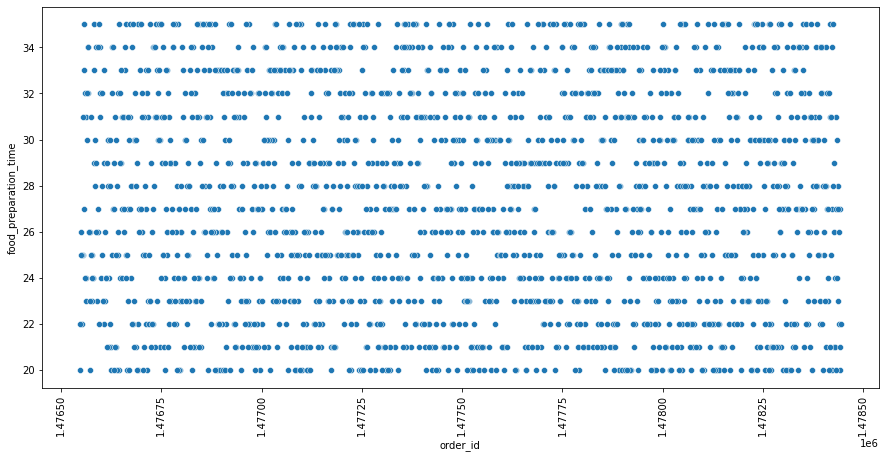

In [24]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='order_id', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

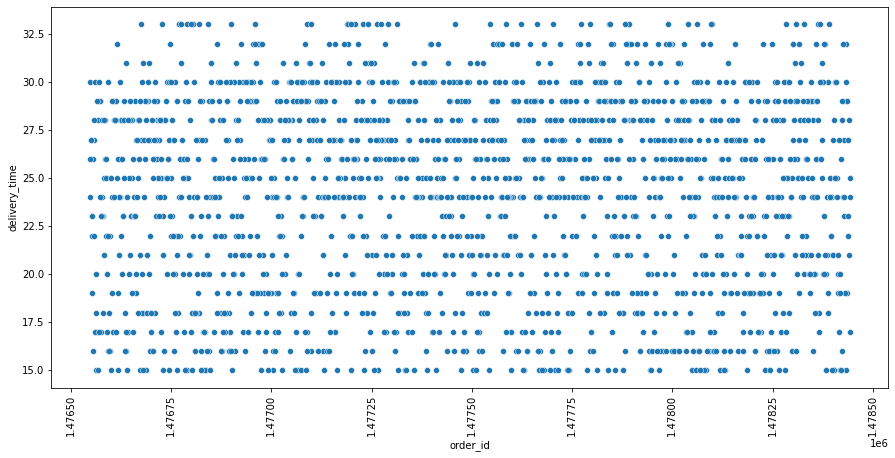

In [25]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='order_id', y='delivery_time')
plt.xticks(rotation=90)
plt.show()

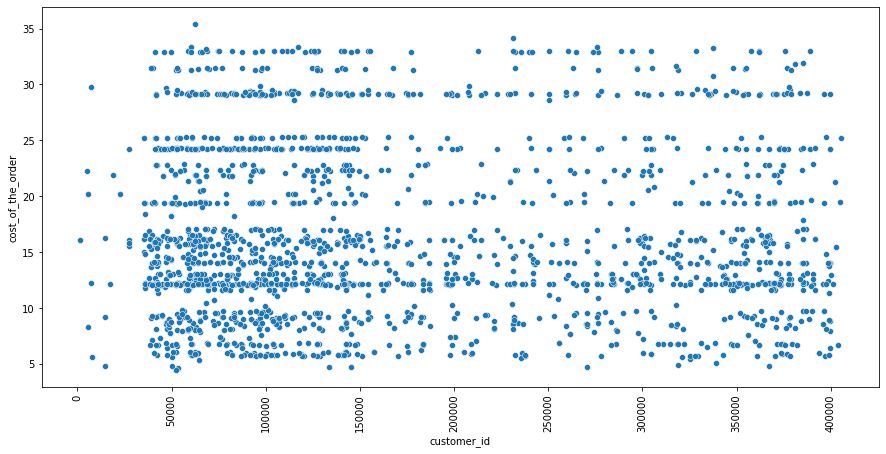

In [26]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='customer_id', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

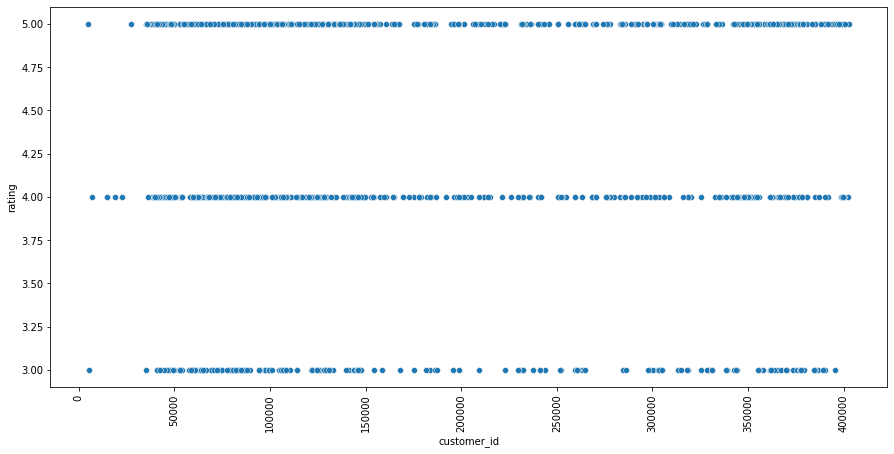

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='customer_id', y='rating')
plt.xticks(rotation=90)
plt.show()

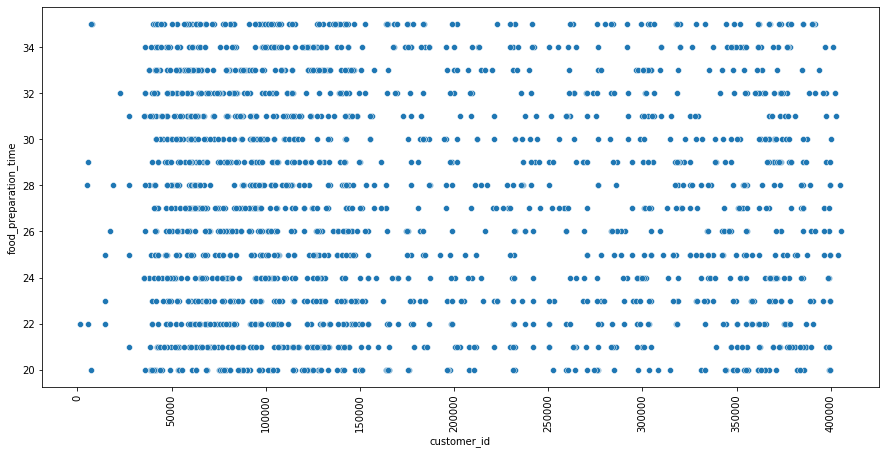

In [28]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='customer_id', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

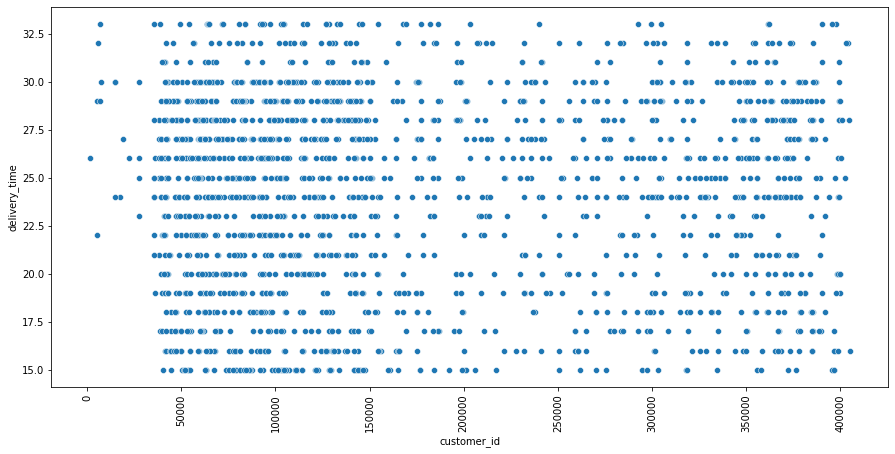

In [29]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='customer_id', y='delivery_time')
plt.xticks(rotation=90)
plt.show()

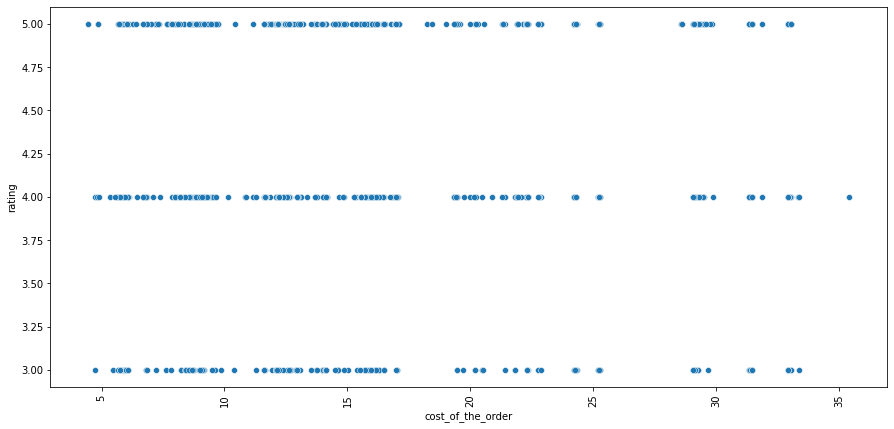

In [30]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='cost_of_the_order', y='rating')
plt.xticks(rotation=90)
plt.show()

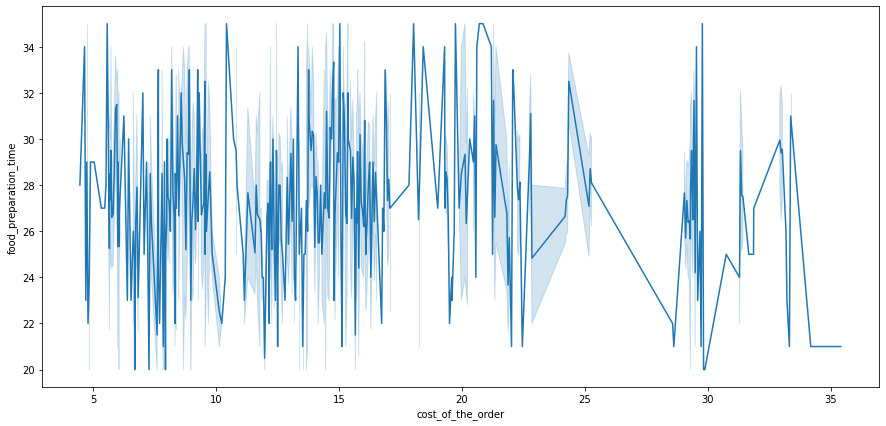

In [31]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cost_of_the_order', y='food_preparation_time')
plt.show()

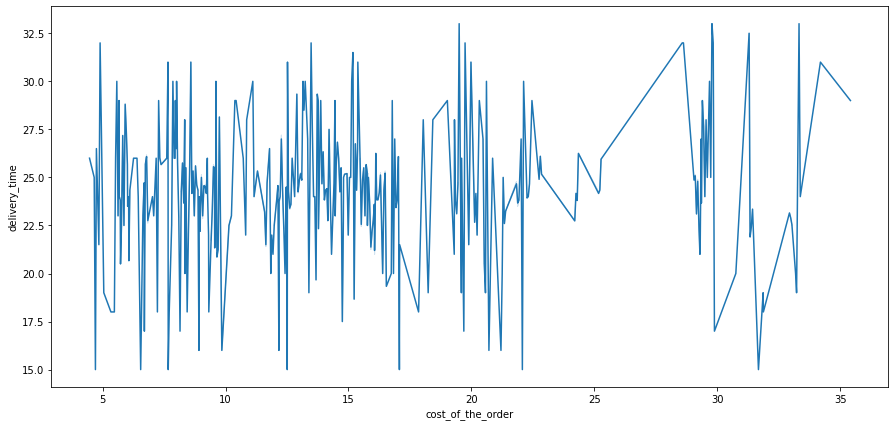

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cost_of_the_order', y='delivery_time', ci=False)
plt.show()

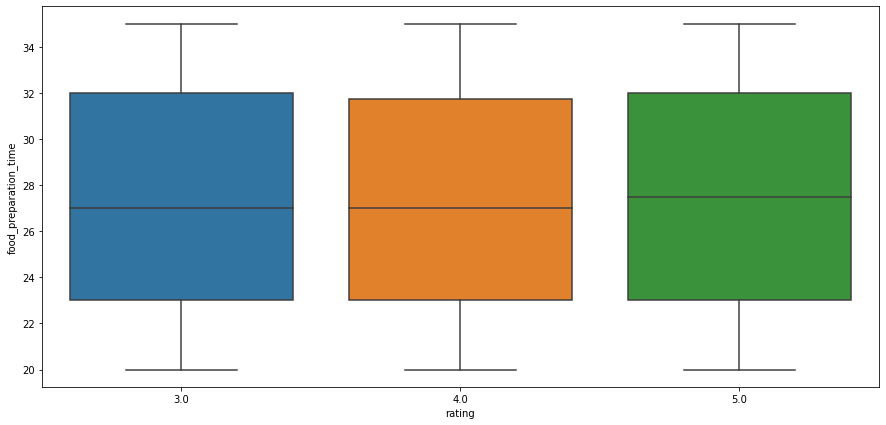

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='rating', y='food_preparation_time')
plt.show()

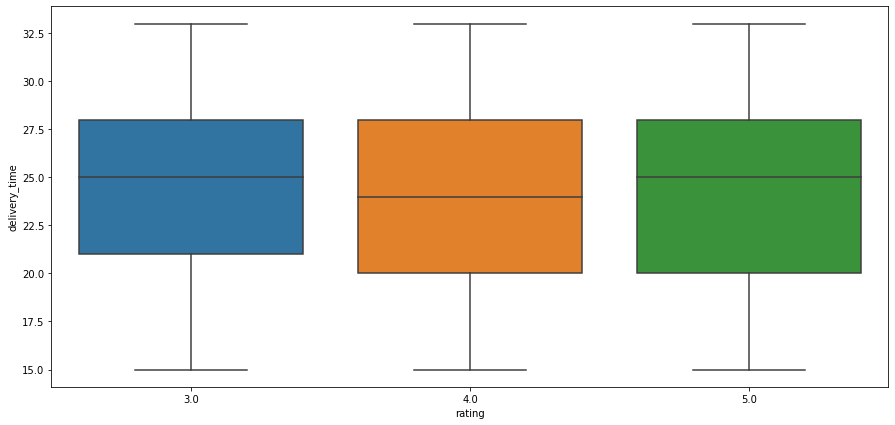

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='rating', y='delivery_time')
plt.show()

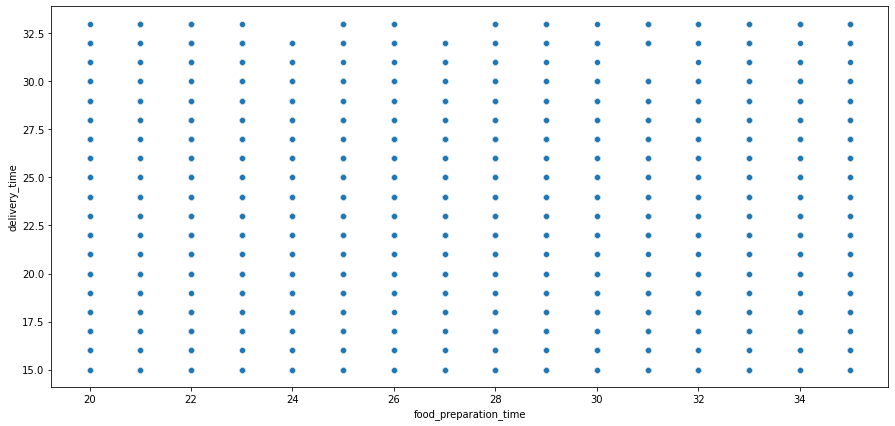

In [50]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='food_preparation_time', y='delivery_time')
plt.show()

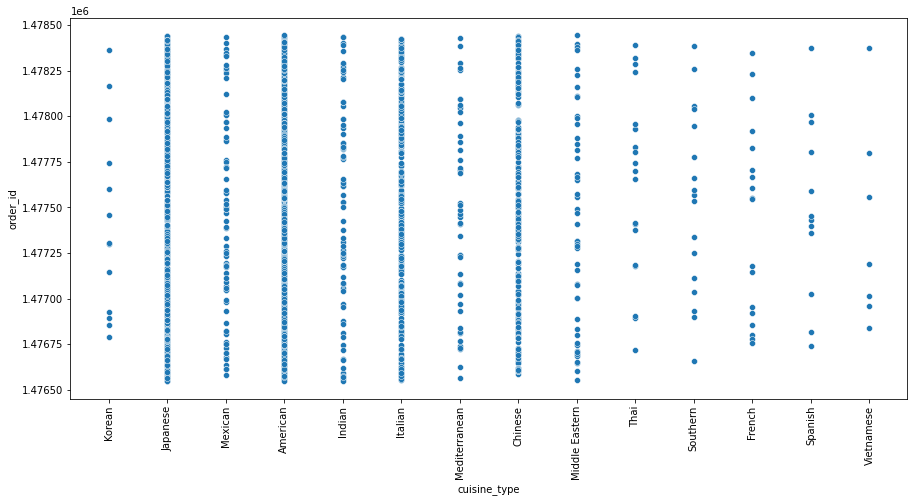

In [51]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df, x='cuisine_type', y='order_id')
plt.xticks(rotation=90)
plt.show()

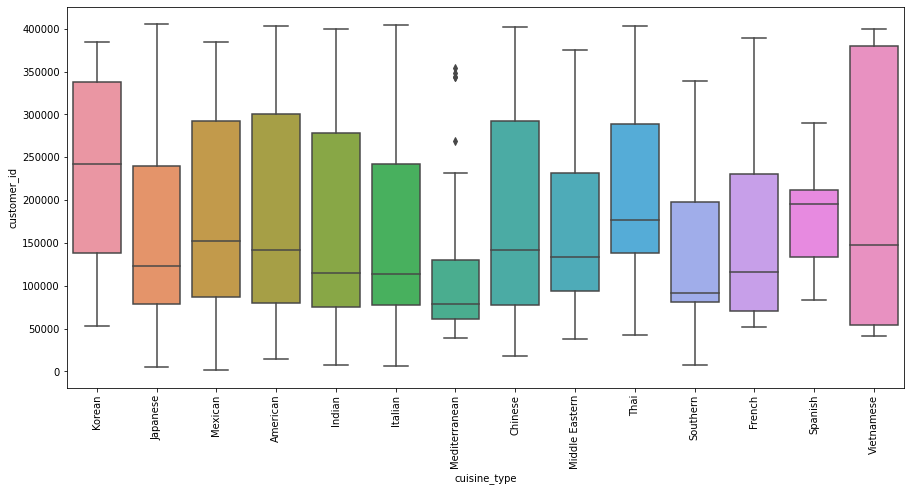

In [37]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='customer_id')
plt.xticks(rotation=90)
plt.show()

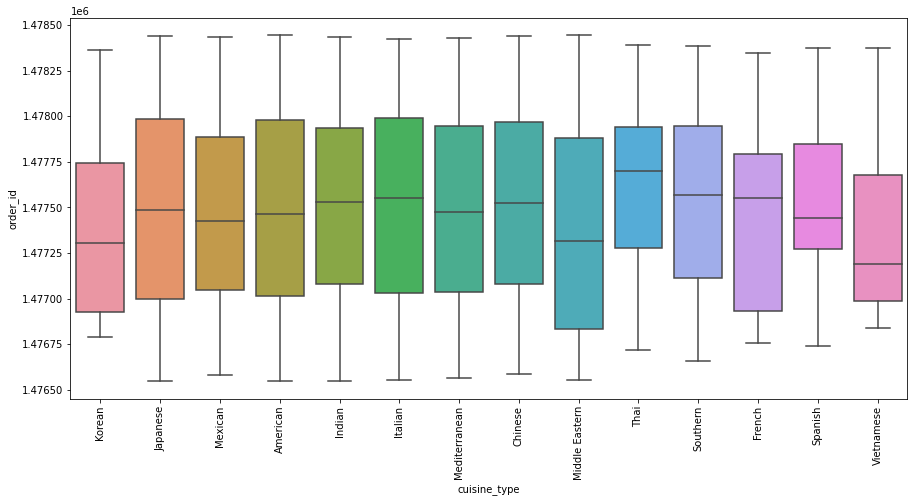

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='order_id')
plt.xticks(rotation=90)
plt.show()

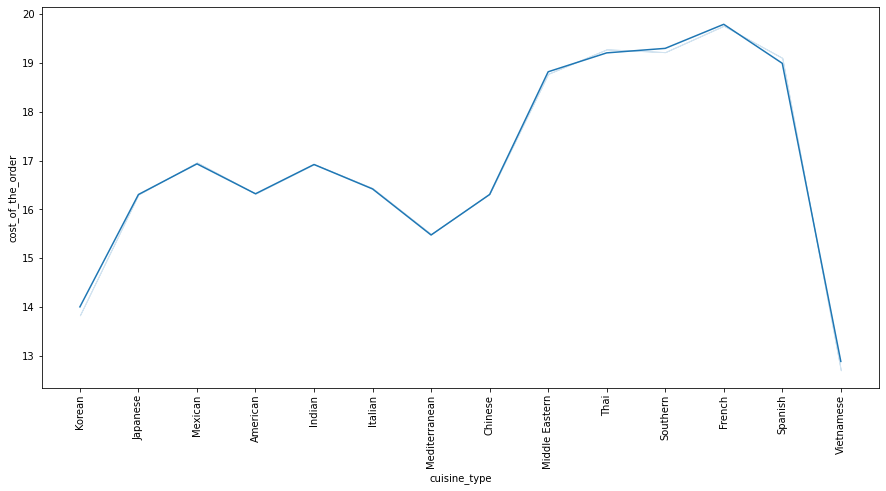

cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64

In [71]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='cost_of_the_order', ci=False)
plt.xticks(rotation=90)
plt.show()

#df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False)

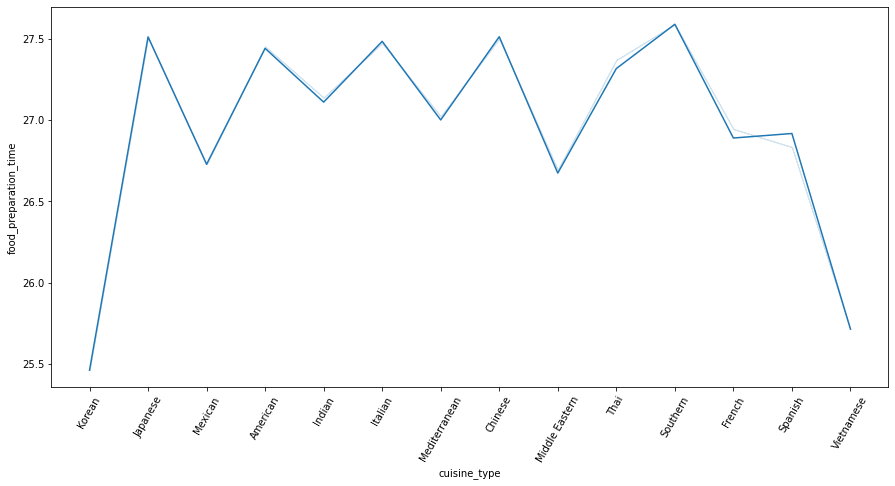

In [68]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='food_preparation_time', ci=False)
plt.xticks(rotation=60)
plt.show()

#df.groupby(['cuisine_type'])['food_preparation_time'].mean().sort_values(ascending=False)

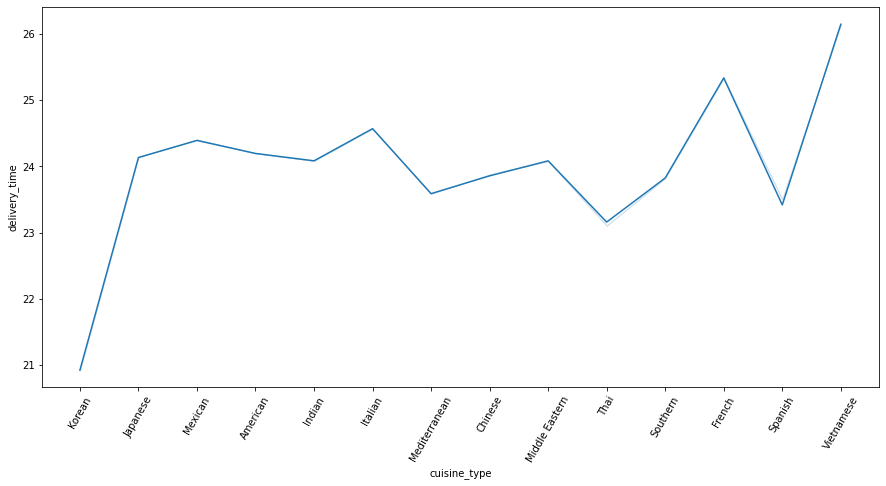

In [63]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x='cuisine_type', y='delivery_time', ci=False)
plt.xticks(rotation=60)
plt.show()

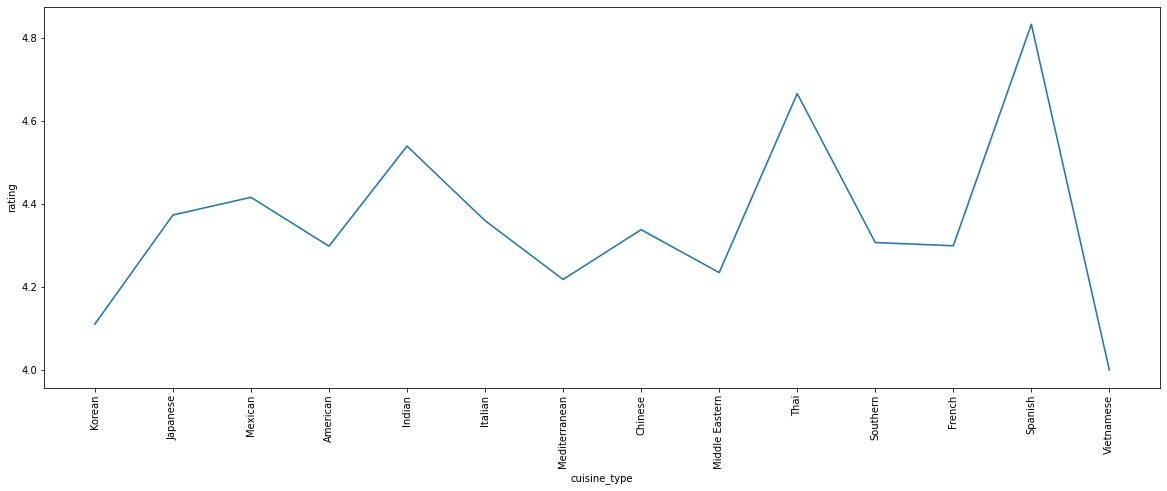

In [61]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x='cuisine_type', y='rating', ci=False)
plt.xticks(rotation=90)
plt.show()

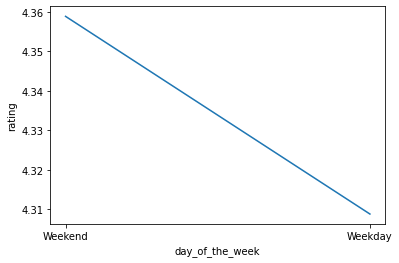

In [42]:
sns.lineplot(data=df, x='day_of_the_week', y='rating', ci=False)
plt.show()

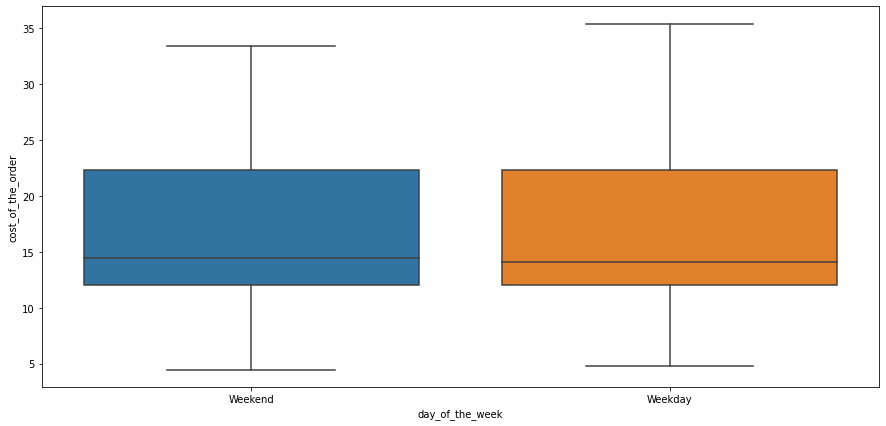

In [43]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order')
plt.show()

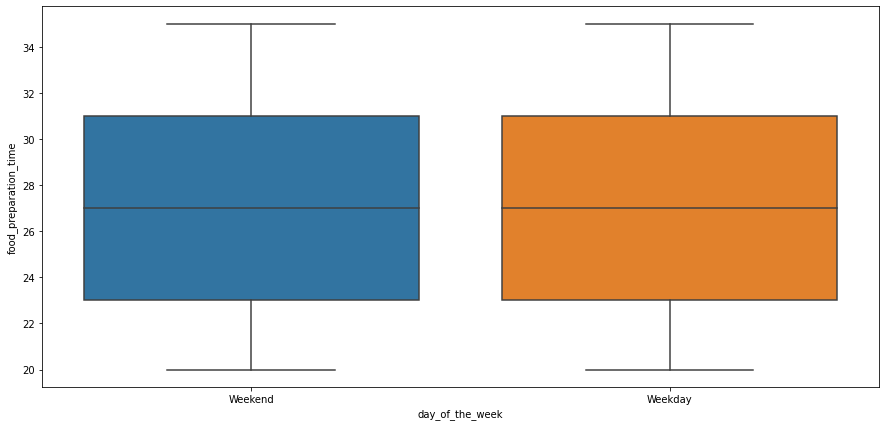

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time')
plt.show()

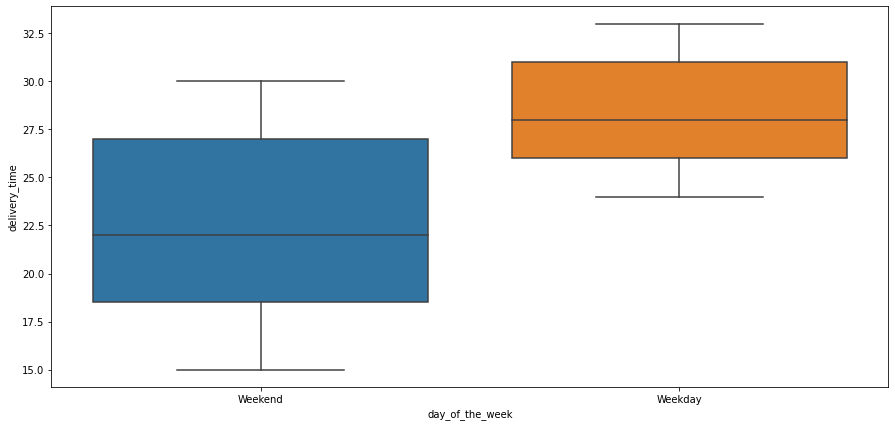

In [45]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [46]:
# Write the code here
print('Rating Counts')
print('-' *50)
rating_count = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False)
print(rating_count)
print('-' *50)
print('Average Rating')
print('-' *50)
avg_rating = df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False)
print(avg_rating)

Rating Counts
--------------------------------------------------
restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
                            ... 
Market Table                   0
Paul & Jimmy's                 0
Room Service                   0
Rohm Thai                      0
Lamarca Pasta                  0
Name: rating, Length: 178, dtype: int64
--------------------------------------------------
Average Rating
--------------------------------------------------
restaurant_name
'wichcraft                       5.0
Ravagh Persian Grill             5.0
Chola Eclectic Indian Cuisine    5.0
Chote Nawab                      5.0
Junoon                           5.0
                                ... 
Rohm Thai                        NaN
Room Service                     NaN
Spice Thai                       NaN
Tarallucci e Vino Restaurant     NaN
Wa Jeal      

#### Observations:
- Shake Shack                 - 133
- The Meatball Shop           -  84
- Blue Ribbon Sushi           -  73 and
- Blue Ribbon Fried Chicken   -  64  have rating counts more than 50

But none of them have the average rating greater than 4.

The following have average rating greater than 4
- 'wichcraft                     -  5.0
- Ravagh Persian Grill           -  5.0
- Chola Eclectic Indian Cuisine  -  5.0
- Chote Nawab                    -  5.0
- Junoon                         -  5.0


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
# Write the code here
cost_of_the_orderAbove20 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()
Above20 = cost_of_the_orderAbove20*0.25
print('Orders above 20 dollars:', Above20)
cost_of_the_orderAbove5 = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<20)]['cost_of_the_order'].sum()
Above5 = cost_of_the_orderAbove5*0.15
print('Orders above 5 dollars:', Above5)
print('The total revenue generated by the company accross all orders is:', Above20+Above5)          

Orders above 20 dollars: 3688.7275
Orders above 5 dollars: 2477.5755000000004
The total revenue generated by the company accross all orders is: 6166.303


#### Observations:
- The company generated 3,688.73 dollars from orders above 20 dollars and 
- 2,477.58 dollars from orders above 5 dollars.

- The total revenue generated by the company across all orders is 6,166.30 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
# Write the code here
df['Total_Time'] = df['delivery_time'] + df['food_preparation_time']
(df[df['Total_Time']>60].shape[0]/df.shape[0])*100

10.537407797681771

#### Observations:
- 10.5% of orders take more than 60 minutes to get delivered from the time the order was placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [49]:
# Write the code here
df.groupby(['day_of_the_week'])[['delivery_time']].mean()
#df.groupby(['day_of_the_week'])['day_of_the_week'].value_counts()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
- on Weekday, the mean delivery time is 28.34
- On Weekend, the mean delivery time is 22.47


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Cost of the order on weekdays is slightly above the cost of the order on weekend
*  Average Delivery time on weekend is faster than average delivery time on weekday
*  The food preparation time on weekend and weekday are the same
*  Rating on Weekend is higher than rating on weekday
*  There are more orders on weekend than weekday
*   
*  38.8% of the orders are not rated
*  American cuisine has the highest number of orders 584 and on weekend, it is the most popular cuisine
*  Shake Shark restaurant has the **highest number of orders 219**
*  Shake Shack has the **higest numbers of rating 133**
*  **Spanish cuisine** has the highest **Average rating** of 4.8
*  **Korean Cuisine** has the lowest **Average Delivery** time of 21 minutes
*  **French cuisine** has the highest average cost of order 19.8
*  **Vietnames Cuisine** has the lowest average cost of order 12.9
*  The highest cost of order is between 11 - 14 dollars
*  Rating 5.0 has the highest number of rating
*  Average Food preparation time is 27 minutes
*  Average Food delivery time is 25 minutes
*  Shake Shack has the highest number of orders received 219
*  Customer_id 52832 has the highest number of orders 13
*  29% of orders cost more than 20 dollars
*  'wichcraft, Ravagh Persian Grill, Chola Eclectic Indian Cuisine, Chote Nawab, and Junoon, have average rating greater than 4.0
*  The company generated 3,688.73 dollars from orders above 20 dollars and
2,477.58 dollars from orders above 5 dollars.
Total revenue generated across all orders is 6,166.30 dollars
*  10.5% of orders take more than 60 minutes to get delivered from the time the order was placed.
*  Food preparation time and cost of order has the highest correlation of 0.042
*  **Korean cuisine** has the fastest delivery time of 25.5


### Recommendations:

*  

---